In [1]:
from plot_T2output import *
import os


old_path = os.getcwd()




In [2]:
os.chdir(old_path)
path = 'sample_files/sample_T2Well_ECO2M/'
os.chdir(path)

raw_names = tuple([r'fflow', r'fstatus', r'coft', r'foft'])
fnames = []
plot_bool = dict()
fnames_map=dict()

for f in os.listdir():
    if f.lower().startswith(raw_names):
        f_size = os.path.getsize(f)
        if f_size>0:
            fnames.append(f)
            flabel = f.lower().split('_')[0]
            fnames_map[flabel]=f
            plot_bool[flabel] = True

    elif f.endswith(tuple(['.in', '.inp'])):
        ip_file = f

    elif f.endswith('out'):
        op_file = f


EOS = get_EOS(op_file)
print('Input file: {:s}'.format(ip_file))
print('EOS version: {:s}'.format(EOS))


eleme, conne = read_ipMESH(ip_file)


Input file: Injection_1km_5bar_1kg.inp
EOS version: ECO2F


In [3]:
eleme

,ElName,NSEQ,NADD,MAT,VOLX,AHTX,PMX,X,Y,Z
1,*bA 1,,,wella,1.000000e+52,NaN,NaN,0.000,0.0,0.0
2,1AA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-25.0
3,1BA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-75.0
4,1CA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-125.0
5,1DA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-175.0
...,...,...,...,...,...,...,...,...,...,...
65,02A92,,,sand1,1.284300e+07,0.0,0.0,475.387,0.0,-1025.0
66,02A93,,,sand1,1.847900e+07,0.0,0.0,569.983,0.0,-1025.0
67,02A94,,,sand1,2.659100e+07,0.0,0.0,683.498,0.0,-1025.0
68,02A95,,,sand1,3.826800e+07,0.0,0.0,819.716,0.0,-1025.0


In [4]:
conne

,EL1,EL2,NSEQ,NAD1,NAD2,ISOT,D1,D2,AREAX,BETAX,SIGX
1,1AA 1,*bA 1,,,,3,25.000000,1.000000e-15,0.038186,-1.0,NaN
2,1BA 1,1AA 1,,,,3,25.000000,2.500000e+01,0.038186,-1.0,NaN
3,1CA 1,1BA 1,,,,3,25.000000,2.500000e+01,0.038186,-1.0,NaN
4,1DA 1,1CA 1,,,,3,25.000000,2.500000e+01,0.038186,-1.0,NaN
5,1EA 1,1DA 1,,,,3,25.000000,2.500000e+01,0.038186,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
64,02A54,02A53,,,,1,0.043200,3.600000e-02,91.813000,0.0,NaN
65,02A53,02A52,,,,1,0.036000,3.000000e-02,69.194000,0.0,NaN
66,02A52,02A51,,,,1,0.030000,2.500000e-02,50.344000,0.0,NaN
67,02A51,02A50,,,,1,0.025000,1.753300e-02,34.636000,0.0,NaN


In [6]:

foft_var, foft_idx, foft = read_FOFT(fnames_map['foft'], EOS)

foft

Processing FOFT_Injection_1km_5bar_1kg file
   8 grid elements reported in foft.


time        2                                         22           \
                     Pres        T S_liquid S_gas   XCO2liq     Pres        T   
0                                                                               
1   1.000000e-03  4.16326   5.6250      0.0   1.0  0.009710  5.00000  30.6250   
2   2.309000e-03  4.16326   5.6250      0.0   1.0  0.009710  5.00000  30.6250   
3   4.022480e-03  4.16326   5.6250      0.0   1.0  0.009710  5.00000  30.6250   
4   6.265430e-03  4.16326   5.6250      0.0   1.0  0.009710  5.00000  30.6250   
5   9.201440e-03  4.16326   5.6250      0.0   1.0  0.009710  5.00000  30.6250   
..           ...      ...      ...      ...   ...       ...      ...      ...   
95  5.593910e+06  6.95894 -15.8874      0.0   1.0  0.018419  8.40320  26.7735   
96  6.593910e+06  6.97868 -15.9725      0.0   1.0  0.018475  8.42856  26.6803   
97  7.593910e+06  6.99565 -16.0408      0.0   1.0  0.018522  8.45034  26.6003   
98  8.593910e+06  7.01050 -16.0973      0.0   1.0  0.018563  8.46939  26.5303   
99  8.640000e+06  7.01079 -16.1316      0.0   1.0  0.018567  8.47020  26.5076   

                   ...       57                                         66  \
   S_liquid S_gas  ...     Pres        T S_liquid S_gas   XCO2liq     Pres   
0                  ...                                                       
1       0.0   1.0  ...  5.00000  30.6250      0.0   1.0  0.006142  5.00000   
2       0.0   1.0  ...  5.00000  30.6250      0.0   1.0  0.006142  5.00000   
3       0.0   1.0  ...  5.00000  30.6250      0.0   1.0  0.006142  5.00000   
4       0.0   1.0  ...  5.00000  30.6250      0.0   1.0  0.006142  5.00000   
5       0.0   1.0  ...  5.00000  30.6250      0.0   1.0  0.006142  5.00000   
..      ...   ...  ...      ...      ...      ...   ...       ...      ...   
95      0.0   1.0  ...  5.62117  30.6359      0.0   1.0  0.006877  5.03630   
96      0.0   1.0  ...  5.65979  30.6365      0.0   1.0  0.006923  5.04899   
97      0.0   1.0  ...  5.69314  30.6370      0.0   1.0  0.006963  5.06206   
98      0.0   1.0  ...  5.72241  30.6375      0.0   1.0  0.006998  5.07525   
99      0.0   1.0  ...  5.72375  30.6375      0.0   1.0  0.007000  5.07586   

                                      
          T S_liquid S_gas   XCO2liq  
0                                     
1   30.6250      0.0   1.0  0.006142  
2   30.6250      0.0   1.0  0.006142  
3   30.6250      0.0   1.0  0.006142  
4   30.6250      0.0   1.0  0.006142  
5   30.6250      0.0   1.0  0.006142  
..      ...      ...   ...       ...  
95  30.6256      0.0   1.0  0.006185  
96  30.6259      0.0   1.0  0.006200  
97  30.6261      0.0   1.0  0.006216  
98  30.6263      0.0   1.0  0.006232  
99  30.6264      0.0   1.0  0.006232  

[99 rows x 41 columns]

In [14]:
eleme

,ElName,NSEQ,NADD,MAT,VOLX,AHTX,PMX,X,Y,Z
1,*bA 1,,,wella,1.000000e+52,NaN,NaN,0.000,0.0,0.0
2,1AA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-25.0
3,1BA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-75.0
4,1CA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-125.0
5,1DA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-175.0
...,...,...,...,...,...,...,...,...,...,...
65,02A92,,,sand1,1.284300e+07,0.0,0.0,475.387,0.0,-1025.0
66,02A93,,,sand1,1.847900e+07,0.0,0.0,569.983,0.0,-1025.0
67,02A94,,,sand1,2.659100e+07,0.0,0.0,683.498,0.0,-1025.0
68,02A95,,,sand1,3.826800e+07,0.0,0.0,819.716,0.0,-1025.0


0 Pres
plot item 2 in Pres plot
item is 2
1AA 1
plot item 22 in Pres plot
item is 22
02A 1
plot item 23 in Pres plot
item is 23
02A50
plot item 32 in Pres plot
item is 32
02A59
plot item 44 in Pres plot
item is 44
02A71
plot item 52 in Pres plot
item is 52
02A79
plot item 57 in Pres plot
item is 57
02A84
plot item 66 in Pres plot
item is 66
02A93
1 T
plot item 2 in T plot
item is 2
1AA 1
plot item 22 in T plot
item is 22
02A 1
plot item 23 in T plot
item is 23
02A50
plot item 32 in T plot
item is 32
02A59
plot item 44 in T plot
item is 44
02A71
plot item 52 in T plot
item is 52
02A79
plot item 57 in T plot
item is 57
02A84
plot item 66 in T plot
item is 66
02A93
2 S_liquid
plot item 2 in S_liquid plot
item is 2
1AA 1
plot item 22 in S_liquid plot
item is 22
02A 1
plot item 23 in S_liquid plot
item is 23
02A50
plot item 32 in S_liquid plot
item is 32
02A59
plot item 44 in S_liquid plot
item is 44
02A71
plot item 52 in S_liquid plot
item is 52
02A79
plot item 57 in S_liquid plot
item is 

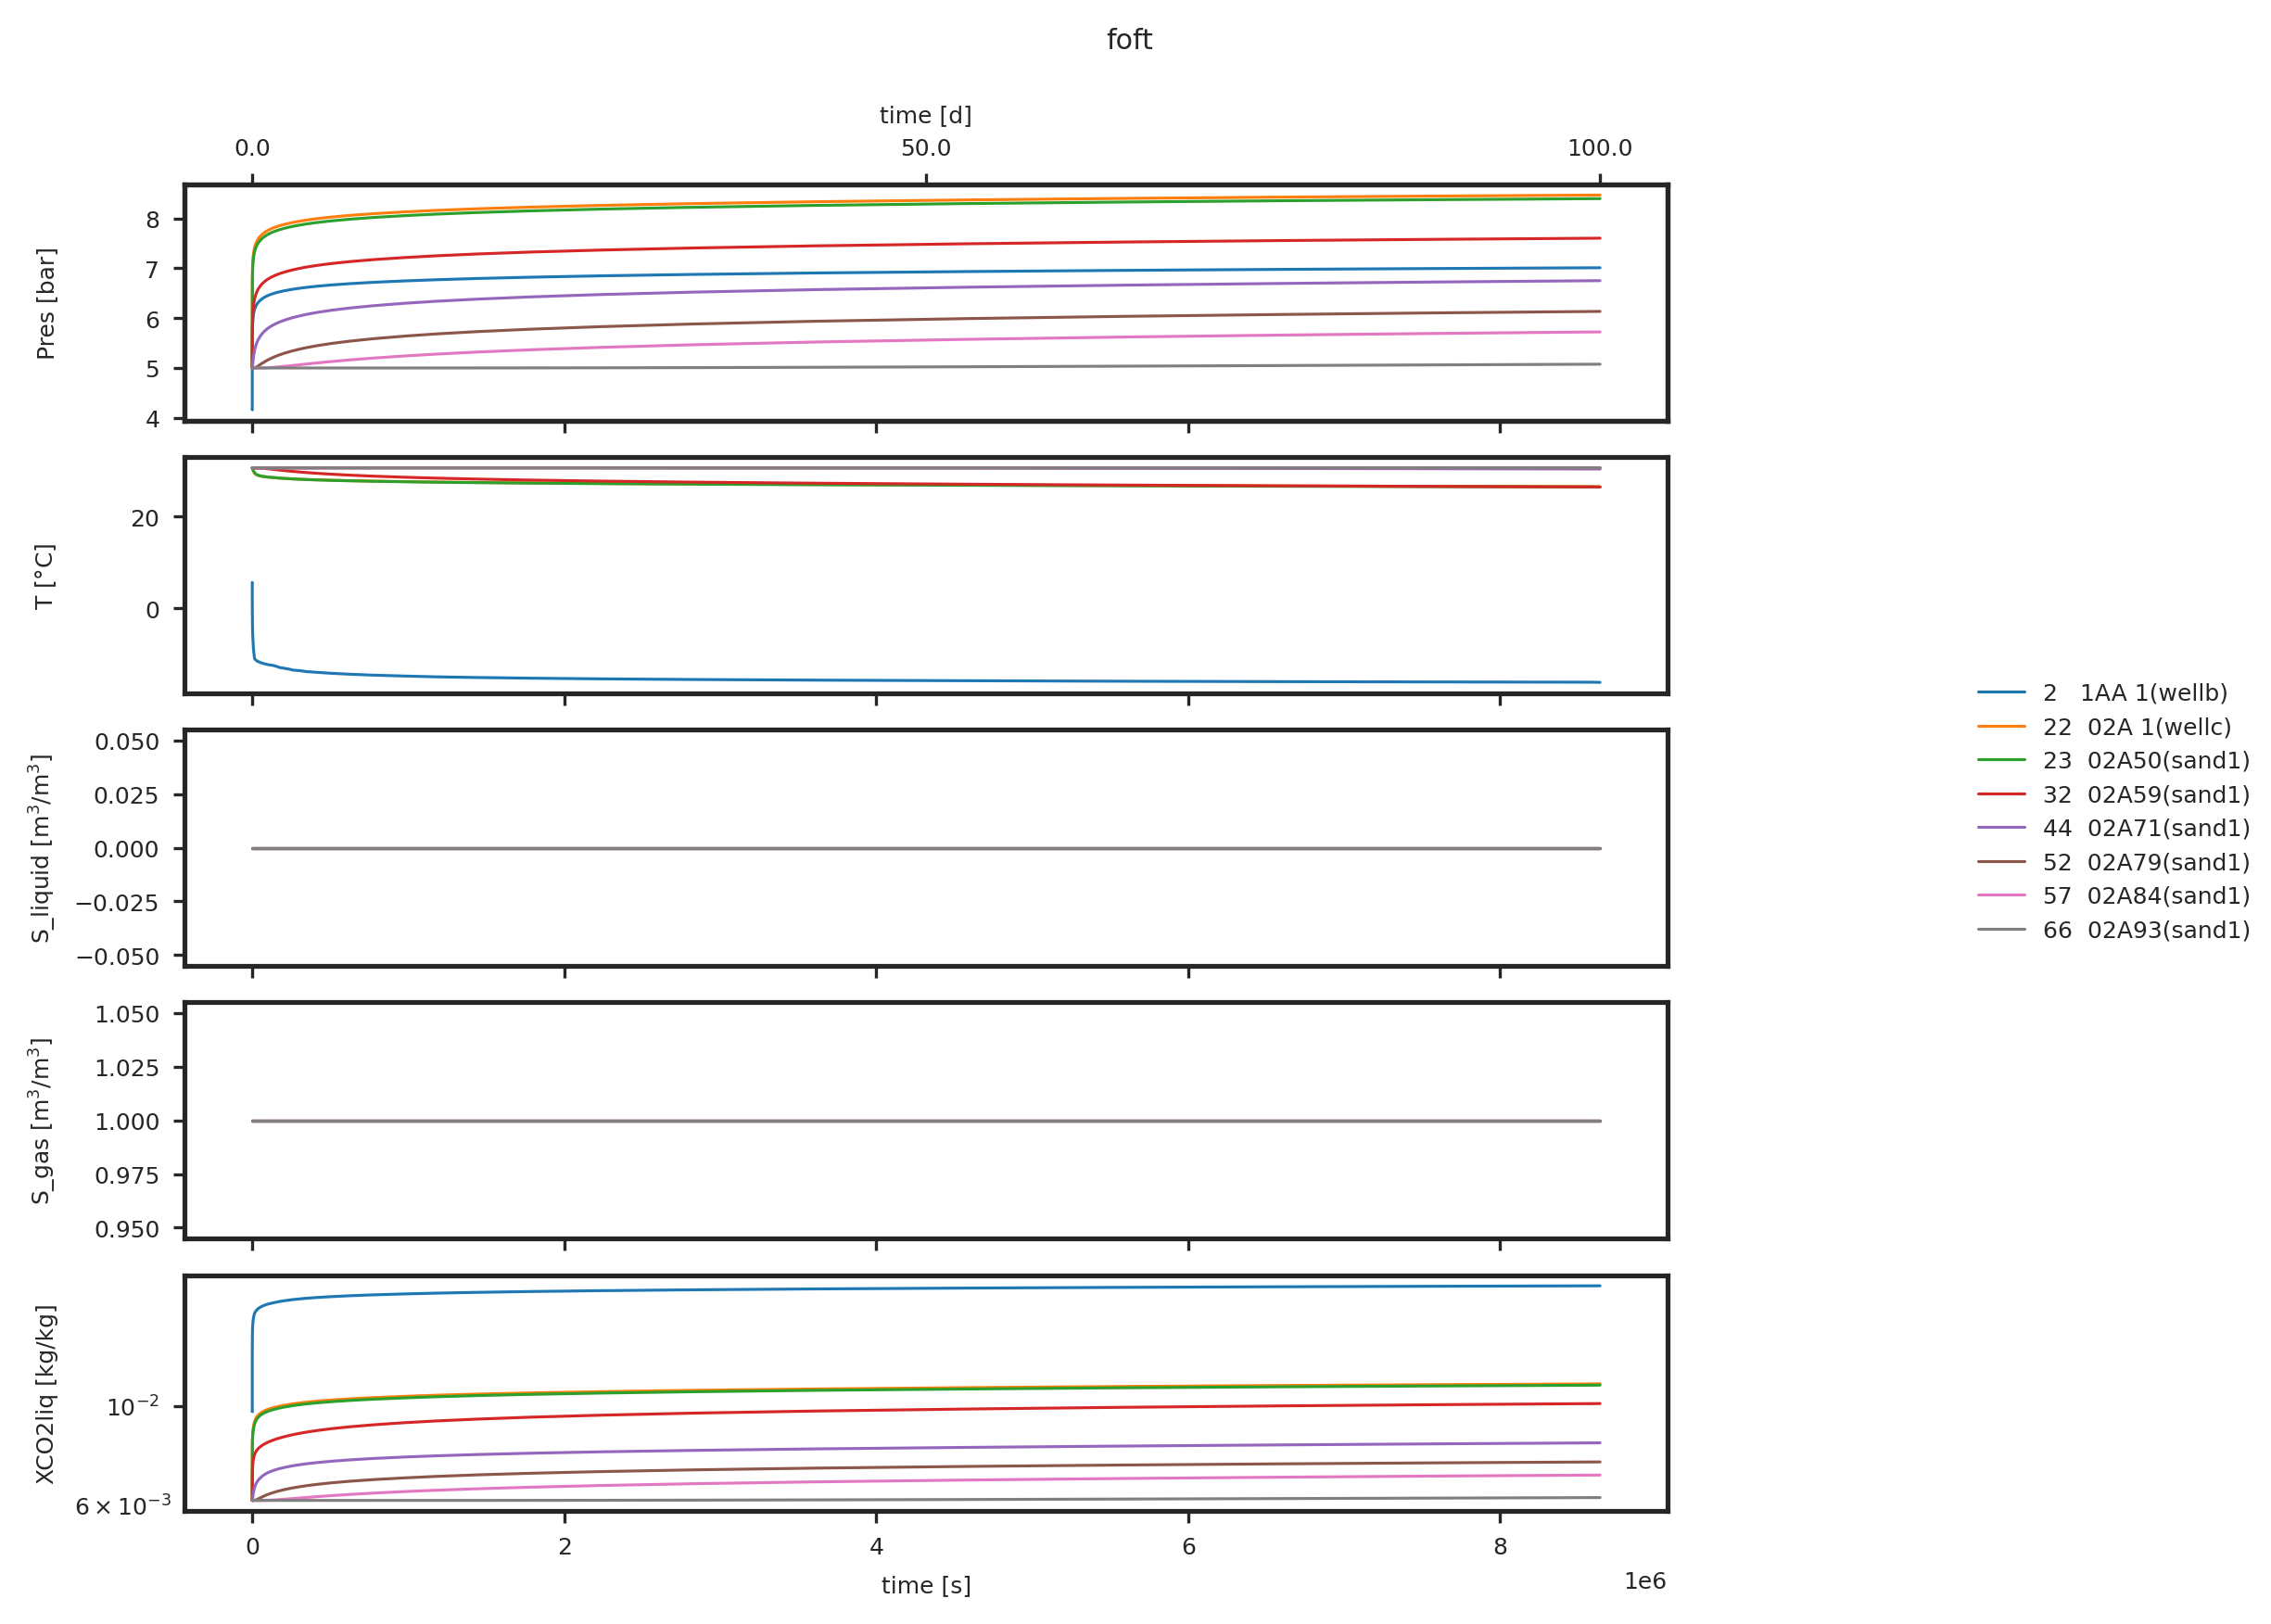

In [12]:


def plot_OFT(title, df, items, df_vars, logscale, mesh_eleme, mesh_conne):
    w = 6
    h = (2.8-1)*len(df_vars)
    
    w = 8.1
    h = 5.85
    rcParams['figure.figsize'] = [w,h]

    mesh_eleme_v2 = mesh_eleme.copy()
    mesh_eleme_v2 = mesh_eleme_v2.set_index(('ElName'))


    fig, axs = plt.subplots(len(df_vars),1, sharex=True)

    for var_idx, var in enumerate(df_vars):

        print(var_idx, var)


        if len(df_vars)>1:
            ax = axs[var_idx]
        else:
            ax = axs

        for item in items:
            print('plot item {:d} in {:s} plot'.format(item,var))

            if title =='coft':
   
                el1 = mesh_conne.loc[item, 'EL1']
                el2 = mesh_conne.loc[item, 'EL2']
                k_dir = mesh_conne.loc[item, 'ISOT']

                mat1 = mesh_eleme_v2.loc[el1,'MAT']
                mat2 = mesh_eleme_v2.loc[el2,'MAT']
                item_label =  '{:s}>{:s}({:s} to {:s} in {:s} dir.)'.format(el1,el2,mat1, mat2, perm_dict[k_dir])



            elif title =='foft':
                print('item is',item)
                el = mesh_eleme.loc[item,'ElName']
                print(el)
                mat = mesh_eleme.loc[item,'MAT']
                item_label = '{:<4d}{:s}({:s})'.format(item,el,mat)
            df.plot(x='time', y=(item, var), ax=ax, label=item_label, legend = False)
            # df.plot(x='time', y=(item, var), ax=ax, label='tt', legend = False)

        ##TEST
        #ax.set_xlim(left=-1, right=30*60)
        ##TEST

        if var == df_vars[-1]:
            ax.set_xlabel('time [s]')

        if var == df_vars[0]:
            secondary_scale(logscale, ax)
        

        
        
        ax.set_ylabel('{:s} [{:s}]'.format(var, units_dict[var]))
        
    if title == 'foft':
        ax.set_yscale('log')

    fig.suptitle(title)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='center right')
    fig.align_ylabels()
    fig.tight_layout(rect=[0,0,0.75,0.98])

plot_OFT('foft', foft, foft_idx, foft_var, logscale=False, mesh_eleme=eleme, mesh_conne=conne)

In [11]:
eleme

,ElName,NSEQ,NADD,MAT,VOLX,AHTX,PMX,X,Y,Z
1,*bA 1,,,wella,1.000000e+52,NaN,NaN,0.000,0.0,0.0
2,1AA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-25.0
3,1BA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-75.0
4,1CA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-125.0
5,1DA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-175.0
...,...,...,...,...,...,...,...,...,...,...
65,02A92,,,sand1,1.284300e+07,0.0,0.0,475.387,0.0,-1025.0
66,02A93,,,sand1,1.847900e+07,0.0,0.0,569.983,0.0,-1025.0
67,02A94,,,sand1,2.659100e+07,0.0,0.0,683.498,0.0,-1025.0
68,02A95,,,sand1,3.826800e+07,0.0,0.0,819.716,0.0,-1025.0


In [ ]:
map(str.)

In [13]:
a = ['Time', 'Depth', 'Sg', 'XCO2liq', 'Pres', 'T', 'Dgas']
try_a.remove('mDepth')

ValueError: list.remove(x): x not in list

In [27]:
a= '0.617132E+06 -10.9072 0.000000E+00 0.000000E+00 0.100000E+01 0.161009E-01 986.73 0.119449E-03  13.11 0.133003E-04'
a = a.split()
a = list(map(float, a))
a

[617132.0,
 -10.9072,
 0.0,
 0.0,
 1.0,
 0.0161009,
 986.73,
 0.000119449,
 13.11,
 1.33003e-05]

In [23]:
foft[foft.time>=1.4e4]

time        2                                        22           \
                  Pres       Sg XNACL XCO2liq         T     Pres       Sg   
0                                                                           
58    14400.0  6.17132 -10.9072   0.0     1.0  0.016101  7.41175  29.4916   
59    17936.9  6.20414 -11.1058   0.0     1.0  0.016196  7.45246  29.3581   
60    21600.0  6.23194 -11.2337   0.0     1.0  0.016274  7.48682  29.2517   
61    26229.8  6.26056 -11.3511   0.0     1.0  0.016353  7.52211  29.1504   
62    28800.0  6.27471 -11.4393   0.0     1.0  0.016394  7.53969  29.1012   
63    34860.4  6.30238 -11.5304   0.0     1.0  0.016469  7.57371  29.0149   
64    36000.0  6.30718 -11.5931   0.0     1.0  0.016486  7.57983  28.9989   
65    43200.0  6.33339 -11.6700   0.0     1.0  0.016556  7.61201  28.9238   
66    50400.0  6.35549 -11.7772   0.0     1.0  0.016618  7.63935  28.8628   
67    57600.0  6.37463 -11.8721   0.0     1.0  0.016672  7.66305  28.8118   
68    64800.0  6.39149 -11.9560   0.0     1.0  0.016720  7.68394  28.7682   
69    72000.0  6.40655 -12.0311   0.0     1.0  0.016763  7.70260  28.7304   
70    79200.0  6.42011 -12.0992   0.0     1.0  0.016801  7.71941  28.6970   
71    86400.0  6.43247 -12.1617   0.0     1.0  0.016836  7.73473  28.6672   
72    94333.0  6.44487 -12.2218   0.0     1.0  0.016871  7.75011  28.6378   
73   104717.0  6.45943 -12.2878   0.0     1.0  0.016912  7.76813  28.6022   
74   118310.0  6.47621 -12.3664   0.0     1.0  0.016959  7.78892  28.5606   
75   136104.0  6.49525 -12.4590   0.0     1.0  0.017013  7.81254  28.5133   
76   159395.0  6.51610 -12.6932   0.0     1.0  0.017081  7.83886  28.4504   
77   172800.0  6.52685 -12.8743   0.0     1.0  0.017121  7.85273  28.4095   
78   203289.0  6.54823 -13.0530   0.0     1.0  0.017187  7.87959  28.3428   
79   243198.0  6.57139 -13.2900   0.0     1.0  0.017262  7.90894  28.2659   
80   259200.0  6.57970 -13.4515   0.0     1.0  0.017294  7.91987  28.2270   
81   311442.0  6.60351 -13.6076   0.0     1.0  0.017364  7.94973  28.1534   
82   345600.0  6.61700 -13.7821   0.0     1.0  0.017410  7.96715  28.0982   
83   413984.0  6.64014 -13.9449   0.0     1.0  0.017480  7.99632  28.0239   
84   503499.0  6.66484 -14.1490   0.0     1.0  0.017556  8.02771  27.9380   
85   620674.0  6.69106 -14.3546   0.0     1.0  0.017637  8.06107  27.8445   
86   774057.0  6.71855 -14.5578   0.0     1.0  0.017720  8.09607  27.7447   
87   974834.0  6.74711 -14.7558   0.0     1.0  0.017806  8.13246  27.6392   
88  1175610.0  6.77045 -14.9269   0.0     1.0  0.017877  8.16237  27.5440   
89  1438430.0  6.79546 -15.0746   0.0     1.0  0.017950  8.19424  27.4498   
90  1782460.0  6.82175 -15.2225   0.0     1.0  0.018027  8.22777  27.3490   
91  2232790.0  6.84911 -15.3684   0.0     1.0  0.018106  8.26267  27.2415   
92  2822280.0  6.87734 -15.5102   0.0     1.0  0.018187  8.29873  27.1279   
93  3593910.0  6.90624 -15.6467   0.0     1.0  0.018270  8.33565  27.0086   
94  4593910.0  6.93540 -15.7763   0.0     1.0  0.018352  8.37293  26.8849   
95  5593910.0  6.95894 -15.8874   0.0     1.0  0.018419  8.40320  26.7735   
96  6593910.0  6.97868 -15.9725   0.0     1.0  0.018475  8.42856  26.6803   
97  7593910.0  6.99565 -16.0408   0.0     1.0  0.018522  8.45034  26.6003   
98  8593910.0  7.01050 -16.0973   0.0     1.0  0.018563  8.46939  26.5303   
99  8640000.0  7.01079 -16.1316   0.0     1.0  0.018567  8.47020  26.5076   

                  ...       57                                        66  \
   XNACL XCO2liq  ...     Pres       Sg XNACL XCO2liq         T     Pres   
0                 ...                                                      
58   0.0     1.0  ...  5.00000  30.6250   0.0     1.0  0.006142  5.00000   
59   0.0     1.0  ...  5.00000  30.6250   0.0     1.0  0.006142  5.00000   
60   0.0     1.0  ...  5.00000  30.6250   0.0     1.0  0.006142  5.00000   
61   0.0     1.0  ...  5.00001  30.6250   0.0     1.0  0.006142  5.00000   
62   0.0   

In [17]:

foft_var, foft_idx, foft = read_FOFT(fnames_map['foft'], EOS)

foft.query('time>=0.166667E+00*24*3600')

Processing FOFT_Injection_1km_5bar_1kg file
   8 grid elements reported in FOFT.


UndefinedVariableError: name 'time' is not defined

In [9]:
pd_units = pd.Series(units_dict_v2)
pd_units

Depth            m
Dis              m
cumDepth         m
Dgas         kg/m3
D_aqueous    kg/m3
D_liquid     kg/m3
D_gas        kg/m3
FLO(CO2)      kg/s
FLO(GAS)      kg/s
FLO(NaCl)     kg/s
FLO(aq.)      kg/s
q_aqueous     kg/s
q_liquid      kg/s
q_gas         kg/s
FLOH             W
Fgas          kg/s
Fliq          kg/s
Pres           bar
Sg           m3/m3
S_aqueous    m3/m3
S_liquid     m3/m3
S_gas        m3/m3
T             degC
Time             s
Umix           m/s
VEL(GAS)       m/s
VEL(LIQ.)      m/s
VGas           m/s
V_aqueous      m/s
V_liquid       m/s
V_gas          m/s
V_mix          m/s
VLiq           m/s
XCO2liq      kg/kg
XNACL        kg/kg
var1             -
var2             -
var3             -
var4             -
dtype: object

In [10]:
fs_row2 = pd_units[fs_row1].to_list()

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['WellID'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

var

In [6]:
fnames_map

{'fflow': 'fflow_Injection_1km_5bar_1kg_ 1',
 'fstatus': 'fstatus_Injection_1km_5bar_1kg_ 1',
 'coft': 'COFT_Injection_1km_5bar_1kg',
 'foft': 'FOFT_Injection_1km_5bar_1kg'}

In [9]:
ip_file = fnames_map['fflow']


var, df = read_FFlow(ip_file, EOS)

var

Processing fflow_Injection_1km_5bar_1kg_ 1 file


['Dis',
 'cumDepth',
 'q_aqueous',
 'q_liquid',
 'q_gas',
 'V_aqueous',
 'V_liquid',
 'V_gas',
 'V_mix']

In [13]:
coft

,1,2,3,4,5,6,7,8,9,10,11
0,,,,,,,,,,,
1,1.000000e-03,1,0.0,0.0,0.000000,0.000000,68,0.0,0.0,-4.574704e-15,-4.574704e-15
2,2.309000e-03,1,0.0,0.0,0.000033,0.000033,68,0.0,0.0,-1.372411e-14,-1.372411e-14
3,4.022481e-03,1,0.0,0.0,0.000077,0.000077,68,0.0,0.0,-2.287352e-14,-2.287352e-14
4,6.265428e-03,1,0.0,0.0,0.000134,0.000134,68,0.0,0.0,-3.659763e-14,-3.659763e-14
5,9.201445e-03,1,0.0,0.0,0.000209,0.000209,68,0.0,0.0,-5.032175e-14,-5.032175e-14
...,...,...,...,...,...,...,...,...,...,...,...
95,5.593914e+06,1,0.0,0.0,1.000000,1.000000,68,0.0,0.0,9.999973e-01,9.999973e-01
96,6.593914e+06,1,0.0,0.0,1.000000,1.000000,68,0.0,0.0,9.999978e-01,9.999978e-01
97,7.593914e+06,1,0.0,0.0,1.000000,1.000000,68,0.0,0.0,9.999981e-01,9.999981e-01


In [6]:
fnames_map['fstatus']

'fstatus_Injection_1km_5bar_1kg_ 1'

In [8]:
ip_file = r'fstatus_Injection_1km_5bar_1kg_ 1'

with open(ip_file) as fs:
    next(fs)
    fs_header = next(fs)

fs_header = fs_header.split('=')[1]
fs_header = fs_header.split(",")
fs_header

fstatus = pd.read_csv(ip_file, skiprows=3, names=fs_header)
fstatus = fstatus.apply(pd.to_numeric, errors='coerce')
fstatus = fstatus.fillna(0)

fstatus

,WellID,Time(s),Dis(m),cumDepth(m),S_aqueous,S_liquid,S_gas,XCO2liq(kg/kg),Pres(Pa),T(<sup<o</sup>C),D_aqueous(kg/m<sup>3</sup>),D_liquid(kg/m<sup>3</sup>),D_gas(kg/m<sup>3</sup>)\n
0,1,0.001,0.0,0.0,0.0,0.0,1.0,0.0,2.500000e+06,5.000000,1000.796030,895.021800,58.152394
1,1,0.001,25.0,-25.0,0.0,0.0,1.0,0.0,4.163259e+05,5.625000,1000.100953,890.867240,8.128557
2,1,0.001,75.0,-100.0,0.0,0.0,1.0,0.0,4.203215e+05,6.875000,1000.070908,882.424495,8.169152
3,1,0.001,125.0,-150.0,0.0,0.0,1.0,0.0,4.243370e+05,8.125000,1000.016427,873.737205,8.209707
4,1,0.001,175.0,-200.0,0.0,0.0,1.0,0.0,4.283724e+05,9.375000,999.938452,864.768155,8.250268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1,8640000.000,825.0,-850.0,0.0,0.0,1.0,0.0,8.175748e+05,22.373951,998.043830,746.040436,15.320247
1448,1,8640000.000,875.0,-900.0,0.0,0.0,1.0,0.0,8.250144e+05,23.739750,997.722149,728.715675,15.384157
1449,1,8640000.000,925.0,-950.0,0.0,0.0,1.0,0.0,8.324861e+05,25.082583,997.387726,709.960078,15.449203
1450,1,8640000.000,975.0,-1000.0,0.0,0.0,1.0,0.0,8.399988e+05,26.376278,997.049050,689.372108,15.517313


In [ ]:
read_FStatus(ip_file)

In [11]:
def read_FStatus(ip_file):

    """
    Function to parse FStatus file.
    It creates a pandas dataframe
    """
    print('Processing {:s} file'.format(ip_file))

    with open(ip_file) as fs:
        next(fs)
        fs_header = next(fs)
    
    fs_header = fs_header.split('=')[1]
    fs_header = fs_header.split()

    fstatus = pd.read_csv(ip_file, skiprows=3, names=fs_header)
    fstatus = fstatus.apply(pd.to_numeric, errors='coerce')
    fstatus = fstatus.fillna(0)
    fstatus['Pres']/= 1e5


    return fs_header[2:], fstatus

In [7]:
read

,ElName,NSEQ,NADD,MAT,VOLX,AHTX,PMX,X,Y,Z
1,*bA 1,,,wella,1.000000e+52,NaN,NaN,0.000,0.0,0.0
2,1AA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-25.0
3,1BA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-75.0
4,1CA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-125.0
5,1DA 1,,,wellb,1.909300e+00,0.0,0.0,0.000,0.0,-175.0
...,...,...,...,...,...,...,...,...,...,...
65,02A92,,,sand1,1.284300e+07,0.0,0.0,475.387,0.0,-1025.0
66,02A93,,,sand1,1.847900e+07,0.0,0.0,569.983,0.0,-1025.0
67,02A94,,,sand1,2.659100e+07,0.0,0.0,683.498,0.0,-1025.0
68,02A95,,,sand1,3.826800e+07,0.0,0.0,819.716,0.0,-1025.0


In [3]:
test = ['plot_T2output.py', 'sample_files/sample_T2Well_ECO2M/Injection_1km_5bar_1kg.inp', 'fstatus']
plot_specs(test, plot_bool, fnames)

file queried: ['fstatus']
items queried: None
asdasd ['fflow_Injection_1km_5bar_1kg_ 1', 'fstatus_Injection_1km_5bar_1kg_ 1', 'COFT_Injection_1km_5bar_1kg', 'FOFT_Injection_1km_5bar_1kg']


({'fflow_Injection_1km_5bar_1kg_ 1': False,
  'fstatus_Injection_1km_5bar_1kg_ 1': False,
  'COFT_Injection_1km_5bar_1kg': False,
  'FOFT_Injection_1km_5bar_1kg': False},
 {})

In [10]:
plot_bool.keys()

dict_keys(['fflow_Injection_1km_5bar_1kg_ 1', 'fstatus_Injection_1km_5bar_1kg_ 1', 'COFT_Injection_1km_5bar_1kg', 'FOFT_Injection_1km_5bar_1kg'])

In [6]:
any(item.startswith('fstatus') for item in fnames)

True

In [ ]:
path = 'sample_files/sample_T2Well_ECO2M/'
os.chdir(path)





os.chdir(old_path)

In [2]:



ip_file = 'case2.inp'

raw_names = [r'FFlow', r'FStatus', r'COFT', r'FOFT']
fnames = []
op_files = []
plot_bool = dict()

for f in os.listdir(os.getcwd()):
    if f in raw_names:
        f_size = os.path.getsize(f)
        if f_size>0:
            fnames.append(f)
            op_files.append(f)
            plot_bool[f] = True


ffunc = []


parse_dict = dict()

for file in fnames:
    if file=='FFlow':
        parse_dict[file]=read_FFlow
    elif file=='FStatus':
        parse_dict[file]=read_FStatus
    elif file=='COFT':
        parse_dict[file]=read_COFT
    elif file=='FOFT':
        parse_dict[file]=read_FOFT

plot_dict = dict()



In [5]:
os.chdir('/')


PATH_ECO2N = r'/workspaces/T2Well_post/sample_files/sample_T2Well_ECO2N'
PATH_ECO2M = r'/workspaces/T2Well_post/sample_files/sample_T2Well_ECO2M'


In [6]:
os.listdir(PATH_ECO2M)

['fflow_Injection_1km_5bar_1kg_ 1',
 'INCON',
 'SAVE',
 'LINEQ',
 'fstatus_Injection_1km_5bar_1kg_ 1',
 'xyzrock.mesh',
 'WHConds_Injection_1km_5bar_1kg.txt',
 'COFT_Injection_1km_5bar_1kg',
 'CO2TAB',
 'Inj.out',
 'VERS',
 'TABLE',
 'Injection_1km_5bar_1kg.inp',
 'FOFT_Injection_1km_5bar_1kg',
 'MESH',
 'DOFT',
 'GENER']

In [12]:
raw_names = tuple([r'fflow', r'fstatus', r'coft', r'foft'])

plot_bool = dict()

for f in os.listdir(PATH_ECO2M):
    if f.lower().startswith(raw_names):
        plot_bool[f] = True

plot_bool

{'fflow_Injection_1km_5bar_1kg_ 1': True,
 'fstatus_Injection_1km_5bar_1kg_ 1': True,
 'COFT_Injection_1km_5bar_1kg': True,
 'FOFT_Injection_1km_5bar_1kg': True}

Bad pipe message: %s [b'\x8b\x13A:\x85\xdct\x91\x81\xe2\xea\xad\x15\xaf\x90`q\xc1 \xd9C\xd3\x17\xf9\xd0\xf7\xb4\xa4\x94g[', b'\xa6\xa8-\xc2\xe31\x13\xdc,\x01\xf6\xb1"\x916\xd00s\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.', b'0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03']
Bad pipe message: %s [b'\x06\x03\x08\x07', b'\x08\t\x08\n\x08\x0b\x08']
Bad pipe message: %s [b'\x05\x08\x06']
Bad pipe message: %s [b'\x05\x01\x06', b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \x8dq\xb1\xa5\n\xd0.\xd5[W\x1d\x03:j^\x86\x91\xf0\xfe\xe7j\x87']
Bad pipe message: %s [b"y;\xdc905\xe2\x05\xc1P\xd6\xe7\xc5\x16P\x8a'\xa2\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\

In [13]:
os.getcwd()

'/'

In [14]:
os.listdir(PATH_ECO2N)

['case2.out',
 'INCON',
 'COFT',
 'SAVE',
 'LINEQ',
 'CO2TAB',
 'Thumbs.db',
 'FOFT',
 'VERS',
 'TABLE',
 'MESH',
 'DOFT',
 'FFlow',
 'GENER',
 'FStatus',
 'case2.inp']

In [15]:
os.chdir(PATH_ECO2N)

In [19]:
os.listdir(os.path.dirname('case2.inp'))



FileNotFoundError: [Errno 2] No such file or directory: ''

In [6]:
fstatus_var, fstatus_df = read_FStatus('FStatus')
fflow_var, fflow_df = read_FFlow('FFlow')



Processing FStatus file
Processing FFlow file


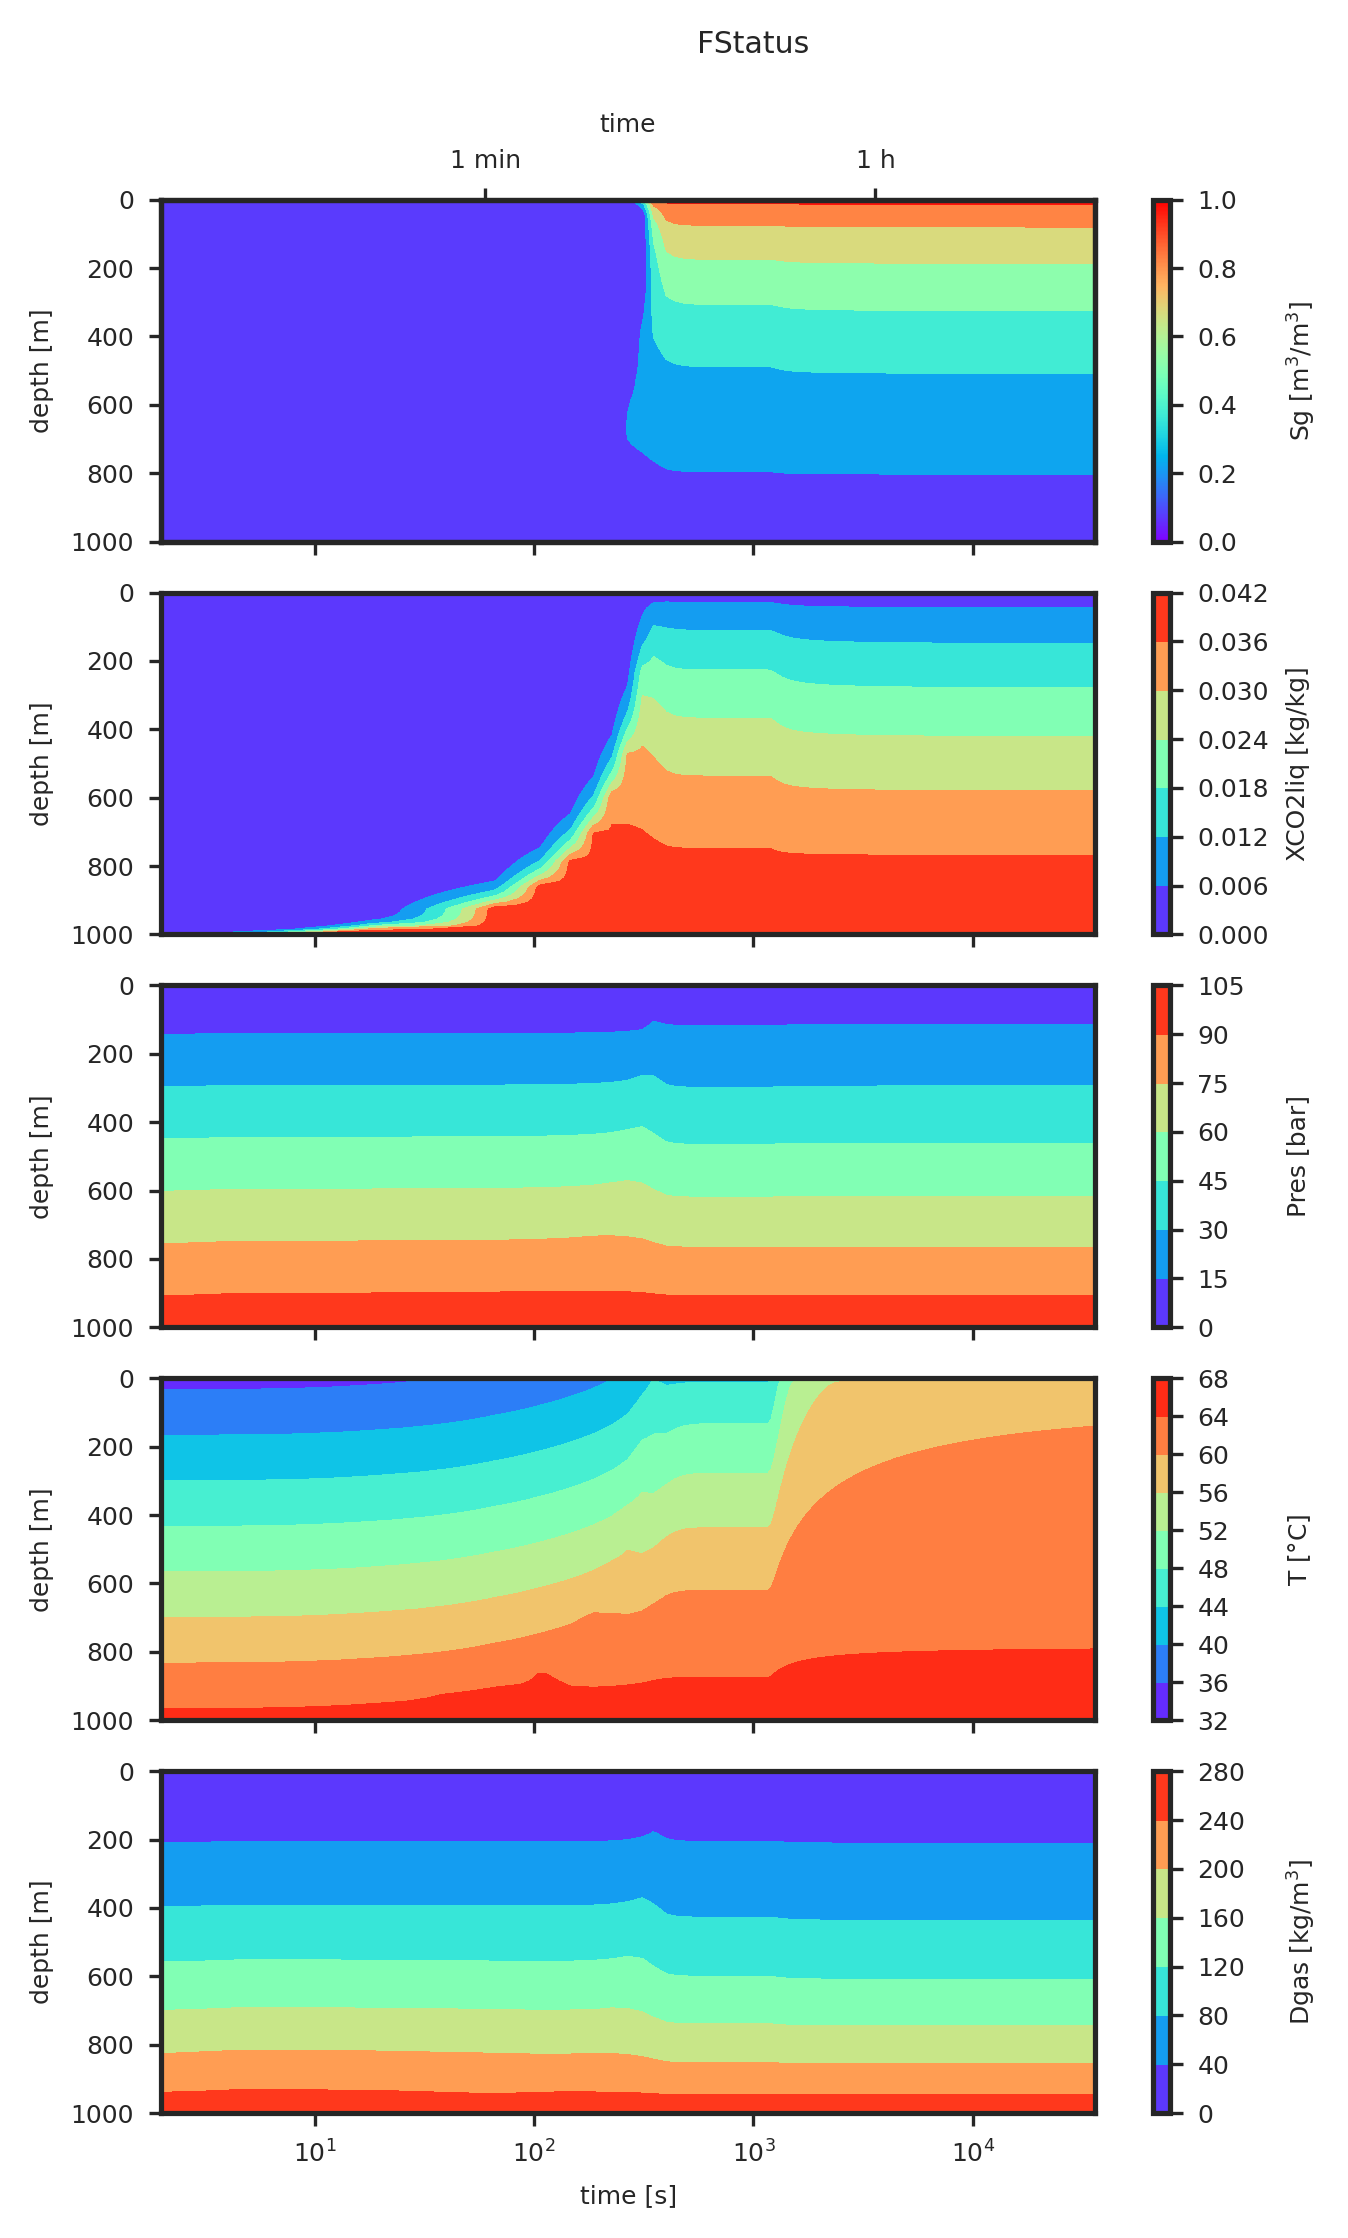

In [7]:
logscale = True

plot_Ffigure('FStatus', fstatus_df, fstatus_var, logscale)

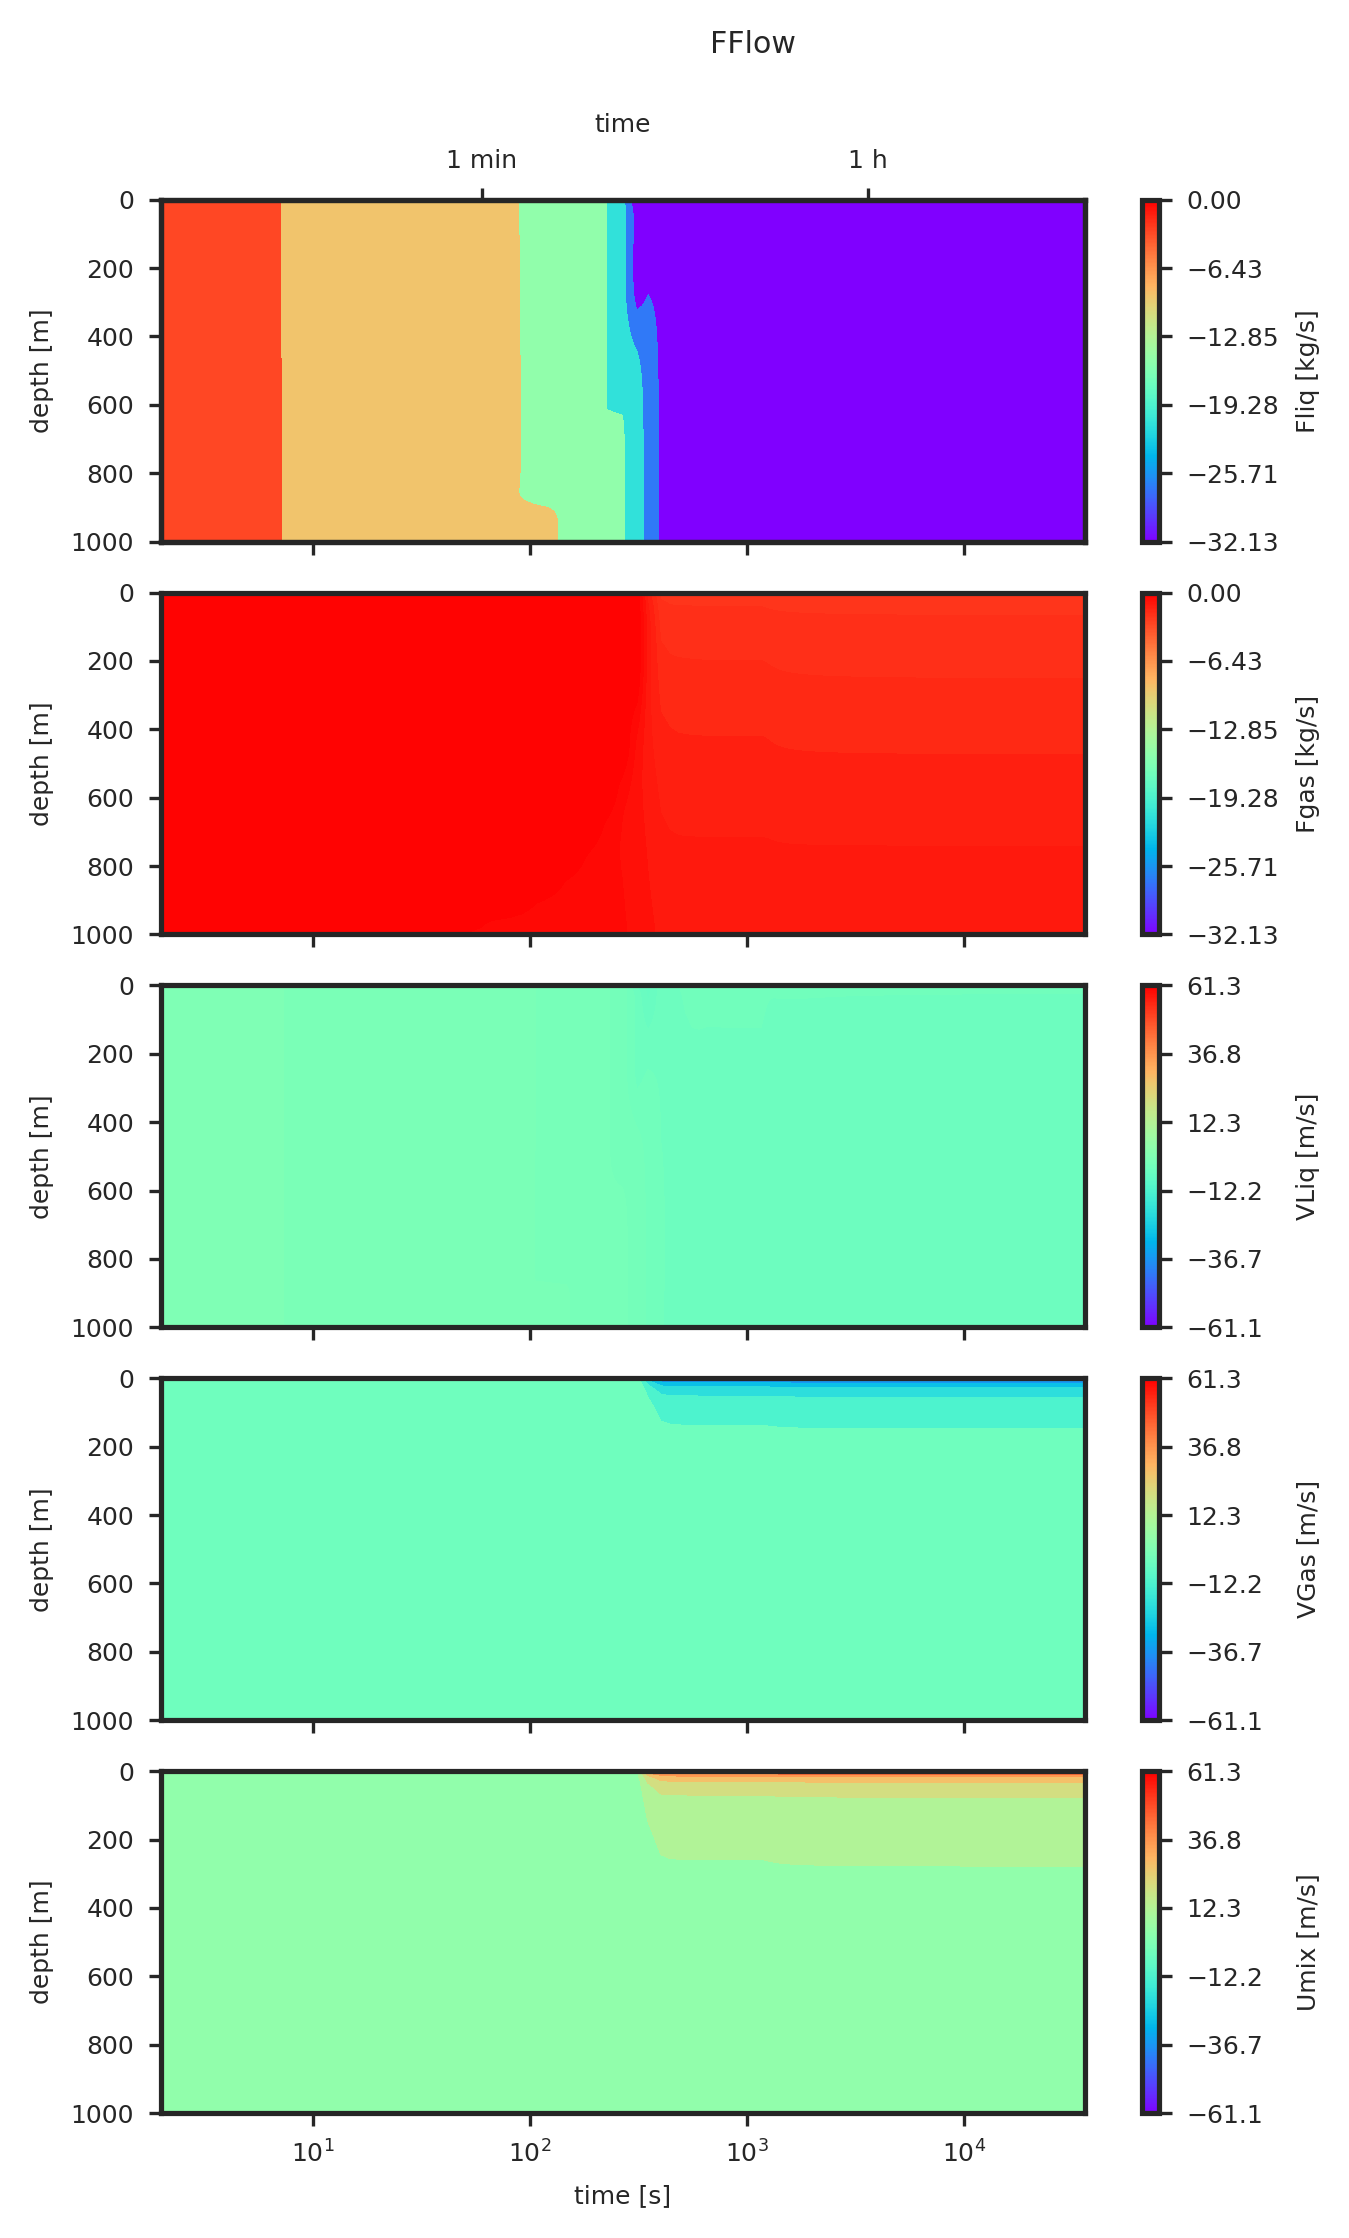

In [8]:
logscale = True

plot_Ffigure('FFlow', fflow_df, fflow_var, logscale)